In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns

In [2]:
data=pd.read_csv('./dataset/HAM10000_metadata.csv')

In [3]:
data=data.drop(columns=['lesion_id'])

In [4]:
data.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
data.isnull().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

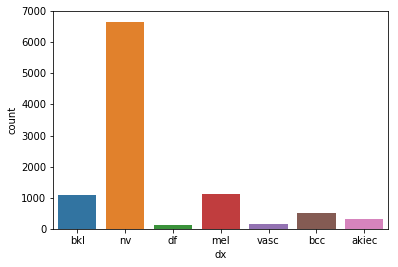

In [8]:
sns.countplot(data['dx'])

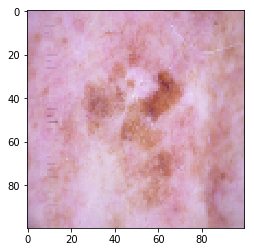

bkl


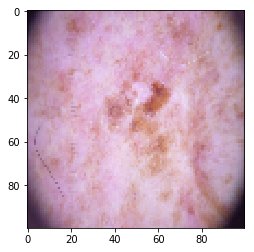

bkl


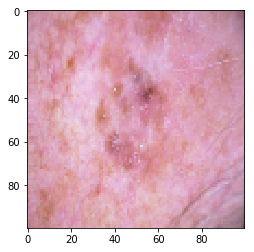

bkl


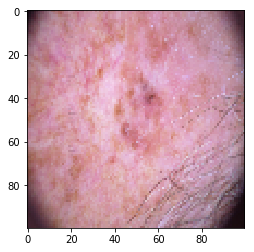

bkl


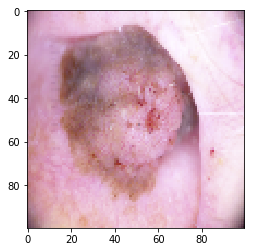

bkl


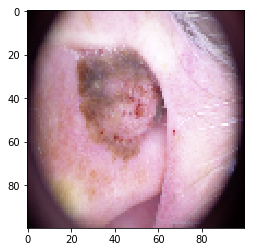

bkl


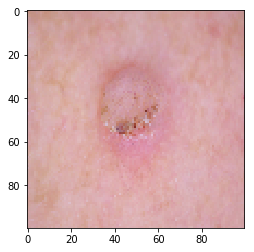

bkl


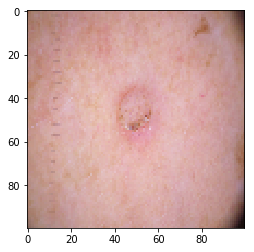

bkl


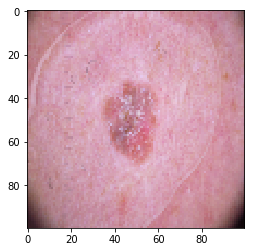

bkl


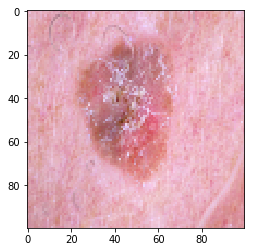

bkl


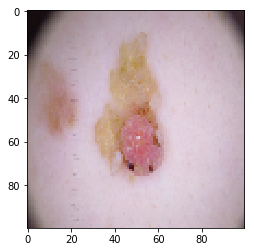

bkl


In [11]:
PATH='.\dataset\HAM10000_images'

#plot the data
count=0
for row in data.iterrows():
    
    
    #print(row[1][0])
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    #image_value.append([img_arr])
    
    plt.imshow(img_arr)
    plt.show() 
    print(row[1][1])
    
    if count==10:
        break
    count+=1



In [12]:
PATH='.\dataset\HAM10000_images'

image_value=[]
for row in data.iterrows():
    
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1]])
    #plt.imshow(img_arr)
    #plt.show() 
    

In [13]:
len(image_value)

9958

In [14]:
import random
random.shuffle(image_value)

In [15]:
X=[]
y=[]

for feature,label in image_value:
    X.append(feature)
    y.append(label)

len(X),len(y)

(9958, 9958)

In [16]:
y

['mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'mel',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'akiec',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'vasc',
 'mel',
 'mel',
 'nv',
 'nv',
 'bkl',
 'akiec',
 'nv',
 'nv',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'mel',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'mel',
 'bcc',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'vasc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'df',
 'nv',
 'nv',
 'nv',
 'bcc',
 'nv',
 'mel',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 

In [17]:
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
y=lbl.fit_transform(y)
y.shape

(9958,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [20]:
from keras.utils import to_categorical

one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
#array reshape
train_X=np.array(train_X).reshape(-1,100,100,3)
train_X=train_X/255.0
test_X=np.array(test_X).reshape(-1,100,100,3)
test_X=test_X/255.0

train_X.shape,test_X.shape,one_hot_train.shape,one_hot_test.shape

((7966, 100, 100, 3), (1992, 100, 100, 3), (7966, 7), (1992, 7))

In [42]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

'''model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))'''

model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)       73856     
__________

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_X,one_hot_train,batch_size=128,epochs=10,validation_split=0.2)

Train on 6372 samples, validate on 1594 samples
Epoch 1/10
6372/6372 [==============================] - 24s 4ms/step - loss: 1.1990 - acc: 0.6607 - val_loss: 1.3841 - val_acc: 0.6675
Epoch 2/10
6372/6372 [==============================] - 24s 4ms/step - loss: 0.9888 - acc: 0.6711 - val_loss: 1.0334 - val_acc: 0.6669
Epoch 3/10
6372/6372 [==============================] - 22s 4ms/step - loss: 0.9236 - acc: 0.6772 - val_loss: 1.0486 - val_acc: 0.6612
Epoch 4/10
6372/6372 [==============================] - 23s 4ms/step - loss: 0.8828 - acc: 0.6871 - val_loss: 0.9434 - val_acc: 0.6851
Epoch 5/10
6372/6372 [==============================] - 23s 4ms/step - loss: 0.8530 - acc: 0.6911 - val_loss: 0.8833 - val_acc: 0.6731
Epoch 6/10
6372/6372 [==============================] - 23s 4ms/step - loss: 0.8108 - acc: 0.7056 - val_loss: 0.8916 - val_acc: 0.6744
Epoch 7/10
6372/6372 [==============================] - 23s 4ms/step - loss: 0.7986 - acc: 0.7070 - val_loss: 0.8539 - val_acc: 0.6895
Epoch 8

In [45]:
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

1992/1992 [==============================] - 3s 2ms/step


(0.7897422213152231, 0.7048192771084337)

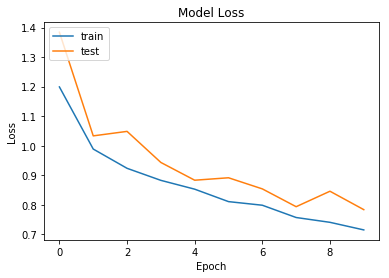

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

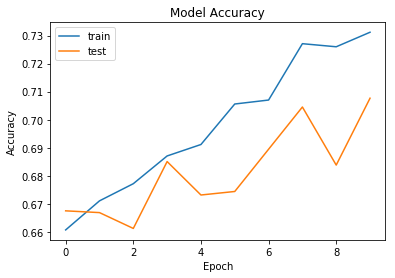

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()